 Visualizing GP Priors and Posteriors for Regression

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
X = np.linspace(0,4*np.pi,100).reshape(100,1)
Y = np.sin(X) + np.random.normal(0,0.05**0.5,100).reshape(100,1)

In [ ]:
def kernel_SE(X1, X2, l):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return  np.exp(-sqdist/l**2)

$\boldsymbol\mu_N = (\sigma^2\mathbf{K^{-1} + I_N})^{-1}\mathbf{y}$

In [ ]:
def post_mean(K,y):
  make_invertible =  np.identity(K.shape[0])*(10**-8)
  val = np.linalg.inv(K+make_invertible)*0.05 + np.identity(K.shape[0])
  return np.linalg.inv(val)@y

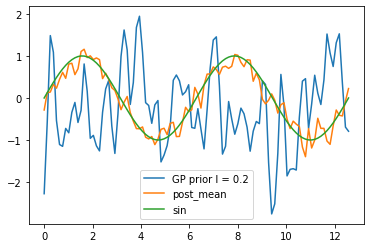

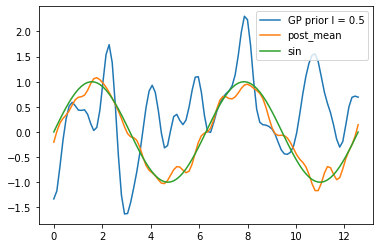

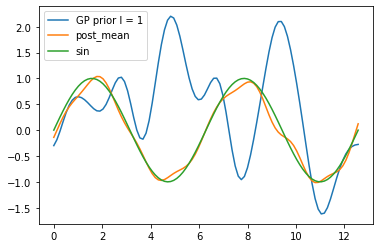

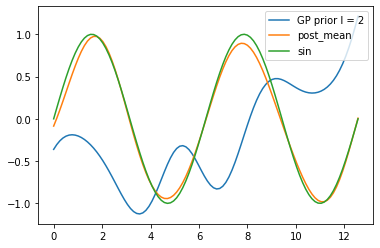

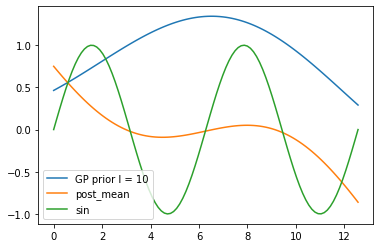

In [ ]:
mu = np.zeros(X.shape)
lvals = [0.2,0.5,1,2,10]
sinval = np.sin(X)
for lval in lvals:
  cov = kernel_SE(X,X, lval)
  sample = np.random.multivariate_normal(mu.ravel(), cov, 1)
  plt.plot(X,sample.reshape(-1,1),label = 'GP prior l = '+str(lval))
  plt.plot(X,post_mean(cov,Y),label = 'post_mean')
  # plt.plot(X,Y,'x')
  plt.plot(X,sinval,label = 'sin')
  plt.legend()
  plt.show()